<a href="https://colab.research.google.com/github/walson6/Implementing-and-Optimizing-Convolutional-Neural-Networks-with-Keras/blob/main/Jim_Implementing_And_Optimizing_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Project Title: Implementing and Optimizing Convolutional Neural Networks with Keras

**Objective:**
To practice using the Keras package for implementing and optimizing Convolutional Neural Networks (CNNs) on the CIFAR-10 dataset.

**Implementation:**
1. **Data Preparation:**
   - Loaded the CIFAR-10 dataset from Keras.
   - The dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
   - Split the data into training (50,000 images) and test (10,000 images) sets.
   - Preprocessed the data by scaling pixel values to the range [0, 1] and converting labels to one-hot encoding.
2. **Model Training and Evaluation:**
   - Simple CNN Model (cnn1):
       - Architecture: Two convolutional layers with max-pooling, followed by a flatten layer and a dense output layer.
       - Trained for 50 epochs with a batch size of 128.
       - Achieved a test accuracy of 68.94%.
   - CNN with Dense Hidden Layer (cnn2):
       - Added a dense hidden layer with 128 neurons and ReLU activation before the output layer.
       - Trained for 50 epochs with a batch size of 128.
       - Achieved a test accuracy of 66.11%.
       - Observation: The model overfitted, as indicated by the high training accuracy and lower validation accuracy.
   - CNN with Dropout (cnn3):
       - Added dropout layers with a dropout rate of 0.25 after the flatten layer and the dense hidden layer.
       - Trained for 50 epochs with a batch size of 128.
       - Achieved a test accuracy of 73.51%.
       - Observation: Dropout helped reduce overfitting and improved generalization to new data.
   - Optimized CNN (cnn4):
       - Increased the number of convolutional layers and adjusted the number of filters.
       - Added dropout layers with varying dropout rates.
       - Trained for 50 epochs with a batch size of 128.
       - Achieved a test accuracy of 75.78%.
       - Observation: The model showed improved performance with more convolutional layers and optimized dropout rates.

3. **Model Evaluation:**
   - Evaluated each model on the test set to measure accuracy and loss.
   - Used confusion matrices and visualizations to analyze model performance.

**Skills Demonstrated:**
- Proficiency in Python and Keras.
- Understanding of Convolutional Neural Networks and their architecture.
- Experience with data preprocessing and scaling.
- Knowledge of regularization techniques (dropout) to prevent overfitting.
- Ability to optimize model performance through hyperparameter tuning.

**Tools and Libraries Used:**
- Python
- Keras
- NumPy
- Matplotlib
- Scikit-learn

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, Activation
from keras.utils import to_categorical

# NumPy: Used for numerical computations.
# Scikit-learn (confusion_matrix): Used to analyze model performance.
# Matplotlib: Used for visualization (e.g., displaying images and confusion matrix).
# Keras: The deep learning library used to build the CNN.
# Keras layers (Conv2D, Dense, Dropout, etc.): These are used to construct the neural network.
# to_categorical: Converts integer labels (0-9) into one-hot encoding for training.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


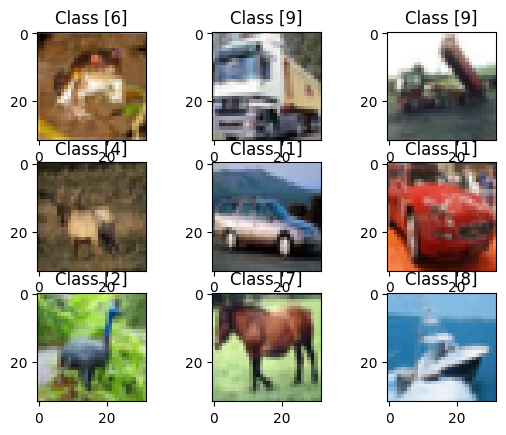

In [2]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# This loads the CIFAR10 dataset, which consists of 10 classes (0-9).
# x_train: Training images (60,000 images of size 32x32 pixels).
# y_train: Corresponding labels (0-9).
# x_test: Test images (10,000 images).
# y_test: Corresponding test labels.

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
# x_train.shape will output (60000, 32, 32), meaning there are 60,000 images of size 32x32 pixels.

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
# Displays the first 9 images from the training set.
# The labels (y_train[i]) are printed above each image.

In [3]:
# Preprocess the data by scaling and converting output to categorical

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 1)
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Pixel values range from 0 to 255
# Dividing by 255 scales them to 0-1, improving model training

# Make sure images have shape (32, 32, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# CNNs expect input as (height, width, channels).
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# Transforms labels like 5 into [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] (one-hot encoding).

x_train shape: (50000, 32, 32, 3, 1)
50000 train samples
10000 test samples


In [4]:
# Simple CNN model
input_shape = (32, 32, 3)
num_classes = 10
cnn1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
# Conv2D(32, (3,3), activation="relu"): Applies 32 filters of size 3x3.
# MaxPooling2D(2,2): Reduces image size by 2x2 pooling.
# Conv2D(64, (3,3), activation="relu"): Another convolution layer with 64 filters.
# MaxPooling2D(2,2): Another pooling layer.
# Flatten(): Converts feature maps into a 1D vector.
# Dense(num_classes, activation="softmax"): Final layer for classification

cnn1.summary()
# Prints the model architecture and parameters

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Fit the model using hyperparameters
batch_size = 128 # 128 images are processed at a time
epochs = 50 # 50 iterations over the dataset
loss= "categorical_crossentropy" # Used for multi-class classification
optimizer="adam" # Adaptive gradient-based optimizer
metrics=["accuracy"]

cnn1.compile(loss=loss, optimizer=optimizer, metrics=metrics)
cnn1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
# Validation split: 10% of the data will be used in the validation set and 90% of the data will be used in the test set

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3339 - loss: 1.8606 - val_accuracy: 0.5126 - val_loss: 1.3856
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5259 - loss: 1.3536 - val_accuracy: 0.5702 - val_loss: 1.2438
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5744 - loss: 1.2275 - val_accuracy: 0.6022 - val_loss: 1.1449
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6123 - loss: 1.1238 - val_accuracy: 0.6232 - val_loss: 1.0869
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6247 - loss: 1.0770 - val_accuracy: 0.6374 - val_loss: 1.0502
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6470 - loss: 1.0189 - val_accuracy: 0.6456 - val_loss: 1.0199
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6625 - loss: 0.9728 - val_accuracy: 0.6650 - val_loss: 0.9849
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6759 - loss: 0.9480 - val_accuracy: 0

In [6]:
print(cnn1.evaluate(x_test, y_test, verbose=0))

[1.0643298625946045, 0.6894000172615051]


In [7]:
# Add dense hidden layer before output layer with 128 neurons and relu activations
input_shape = (32, 32, 3)
num_classes = 10
cnn2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
cnn2.summary()

# Train the model
batch_size = 128
epochs = 50
loss= "categorical_crossentropy"
optimizer="adam"
metrics=["accuracy"]

cnn2.compile(loss=loss, optimizer=optimizer, metrics=metrics)
cnn2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test set
print(cnn2.evaluate(x_test, y_test, verbose=0))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3446 - loss: 1.8115 - val_accuracy: 0.5042 - val_loss: 1.3699
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5556 - loss: 1.2584 - val_accuracy: 0.6106 - val_loss: 1.1246
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6148 - loss: 1.1041 - val_accuracy: 0.6394 - val_loss: 1.0503
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6529 - loss: 0.9977 - val_accuracy: 0.6548 - val_loss: 0.9955
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6799 - loss: 0.9272 - val_accuracy: 0.6560 - val_loss: 0.9820
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7002 - loss: 0.8671 - val_accuracy: 0.6746 - val_loss: 0.9474
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7158 - loss: 0.8193 - val_accuracy: 0.6974 - val_loss: 0.8788
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7330 - loss: 0.7726 - val_accuracy: 0

### Observations

After adding a dense hidden layer before the output layer, the model increased its accuracy from 84.74% to 98.79%, indicating that it is learning the data well. But, the validation accuracy score is a lower than the model without a dense hidden layer. Validation loss is high because the model isn't doing well with new data, which means it is overfitting.

In [8]:
# Add dropout with p=0.25 after the flatten layer and after the first dense layer from the last model
input_shape = (32, 32, 3)
num_classes = 10
cnn3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
cnn3.summary()

# Train the model
batch_size = 128
epochs = 50
loss= "categorical_crossentropy"
optimizer="adam"
metrics=["accuracy"]

cnn3.compile(loss=loss, optimizer=optimizer, metrics=metrics)
cnn3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test set
print(cnn3.evaluate(x_test, y_test, verbose=0))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.3182 - loss: 1.8602 - val_accuracy: 0.5214 - val_loss: 1.3503
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5110 - loss: 1.3704 - val_accuracy: 0.6032 - val_loss: 1.1529
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5744 - loss: 1.2071 - val_accuracy: 0.6290 - val_loss: 1.0876
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6083 - loss: 1.1158 - val_accuracy: 0.6472 - val_loss: 1.0118
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6360 - loss: 1.0406 - val_accuracy: 0.6710 - val_loss: 0.9689
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6552 - loss: 0.9840 - val_accuracy: 0.6822 - val_loss: 0.9301
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6687 - loss: 0.9534 - val_accuracy: 0.6978 - val_loss: 0.8811
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6868 - loss: 0.8946 - val_accuracy: 

### Observations

After adding dropout layers, this model improved accuracy ~6-8% and reduced loss compared to the two previous models. Adding dropout layers after dense layers can help with overfitting and generalize to new data (test data).


In [9]:
# Trying to find the best possible accuracy by optimizing the amount of convolution layers, filters,
# number of neurons in the dense layer, dropout probabilities, batch size, and epochs
input_shape = (32, 32, 3)
num_classes = 10
cnn4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(rate=0.1),

        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(rate=0.2),

        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(rate=0.3),

        keras.layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(rate=0.3),

        keras.layers.Flatten(),

        keras.layers.Dropout(rate=0.25),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(rate=0.25),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)
# Model structure:
# 1st Conv2D + MaxPooling2D with dropout 0.1
# 2nd Conv2D + MaxPooling2D with dropout 0.2
# 3rd Conv2D + MaxPooling2D with dropout 0.3
# 4th Conv2D + MaxPooling2D with dropout 0.3
# flatten
# dropout 0.25 Out[23]: In [24]:
# hidden layer Dense with 256 nero
# dropout 0.25
# output

cnn4.summary()

# Train the model
batch_size = 128
epochs = 50
loss= "categorical_crossentropy"
optimizer="adam"
metrics=["accuracy"]

cnn4.compile(loss=loss, optimizer=optimizer, metrics=metrics)
cnn4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the model on the test set
print(cnn4.evaluate(x_test, y_test, verbose=0))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 653,386 (2.49 MB)

 Trainable params: 653,386 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.2358 - loss: 2.0134 - val_accuracy: 0.4772 - val_loss: 1.4377
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4860 - loss: 1.4011 - val_accuracy: 0.5886 - val_loss: 1.1434
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5699 - loss: 1.1939 - val_accuracy: 0.6524 - val_loss: 0.9842
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6143 - loss: 1.0714 - val_accuracy: 0.6876 - val_loss: 0.9000
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6495 - loss: 0.9859 - val_accuracy: 0.7010 - val_loss: 0.8529
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6731 - loss: 0.9136 - val_accuracy: 0.7128 - val_loss: 0.8022
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6921 - loss: 0.8690 - val_accuracy: 0.7434 - val_loss: 0.7389
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7120 - loss: 0.8236 - val_accuracy: 

The combination of a well-designed convolutional architecture, appropriate activation functions, regularization techniques, and optimized training parameters allows this model to achieve over 80% validation accuracy. The progressive increase in the number of filters, the use of dropout, and the choice of training parameters all contribute to the model's performance.